ML Models for Lung Cancer Detection

DATA COLLECTION

In [28]:
import pandas as pd

lung_cancer_detection = pd.read_csv("lung_cancer_detection.csv")
lung_cancer_detection.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [29]:
lung_cancer_detection.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [30]:
lung_cancer_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

DATA EXPLORATION

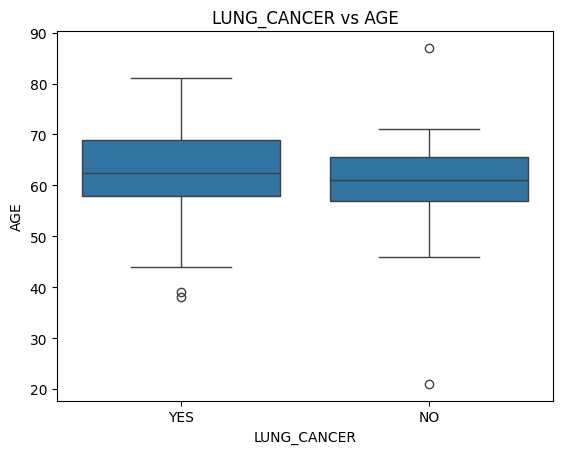

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=lung_cancer_detection,x="LUNG_CANCER",y="AGE")
plt.title("LUNG_CANCER vs AGE")
plt.show()

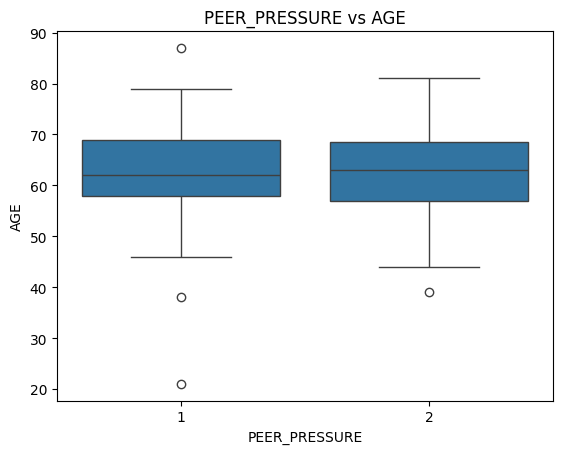

In [32]:
sns.boxplot(data=lung_cancer_detection,x="PEER_PRESSURE",y="AGE")
plt.title("PEER_PRESSURE vs AGE")
plt.show()

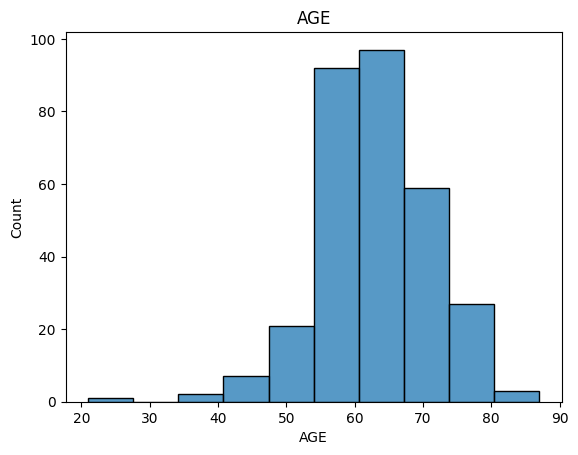

In [33]:
sns.histplot(data=lung_cancer_detection,x="AGE", bins=10)
plt.title("AGE")
plt.show()

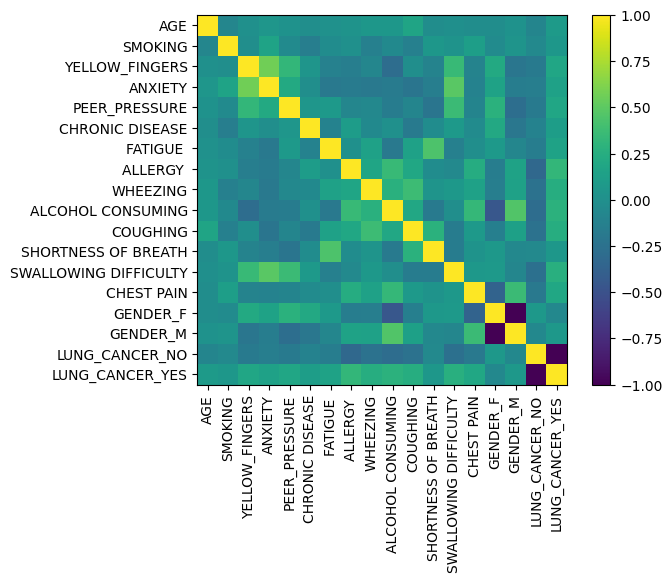

In [34]:
lung_cancer_detection_encoded = pd.get_dummies(lung_cancer_detection)
corr = lung_cancer_detection_encoded.corr()
plt.imshow(corr)
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

DATA PREPARATION

In [36]:
from sklearn.model_selection import train_test_split

y = lung_cancer_detection[['LUNG_CANCER']]
x = lung_cancer_detection.drop(columns = ["LUNG_CANCER","GENDER"])
x_train, x_test, y_train, y_test = train_test_split(
    x,y,test_size=0.2,stratify=y,random_state=1234
)
x_train.shape, x_test.shape

((247, 14), (62, 14))

MODEL TRAINING

Decision Tree Model

In [55]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(
    criterion = "entropy",
    random_state = 1234
)

model = dtc.fit(x_train,y_train)

y_pred = dtc.predict(x_test)

model.score(x_test,y_test)
#model.score(x_train,y_train)

0.8709677419354839

Decision Tree Visualization

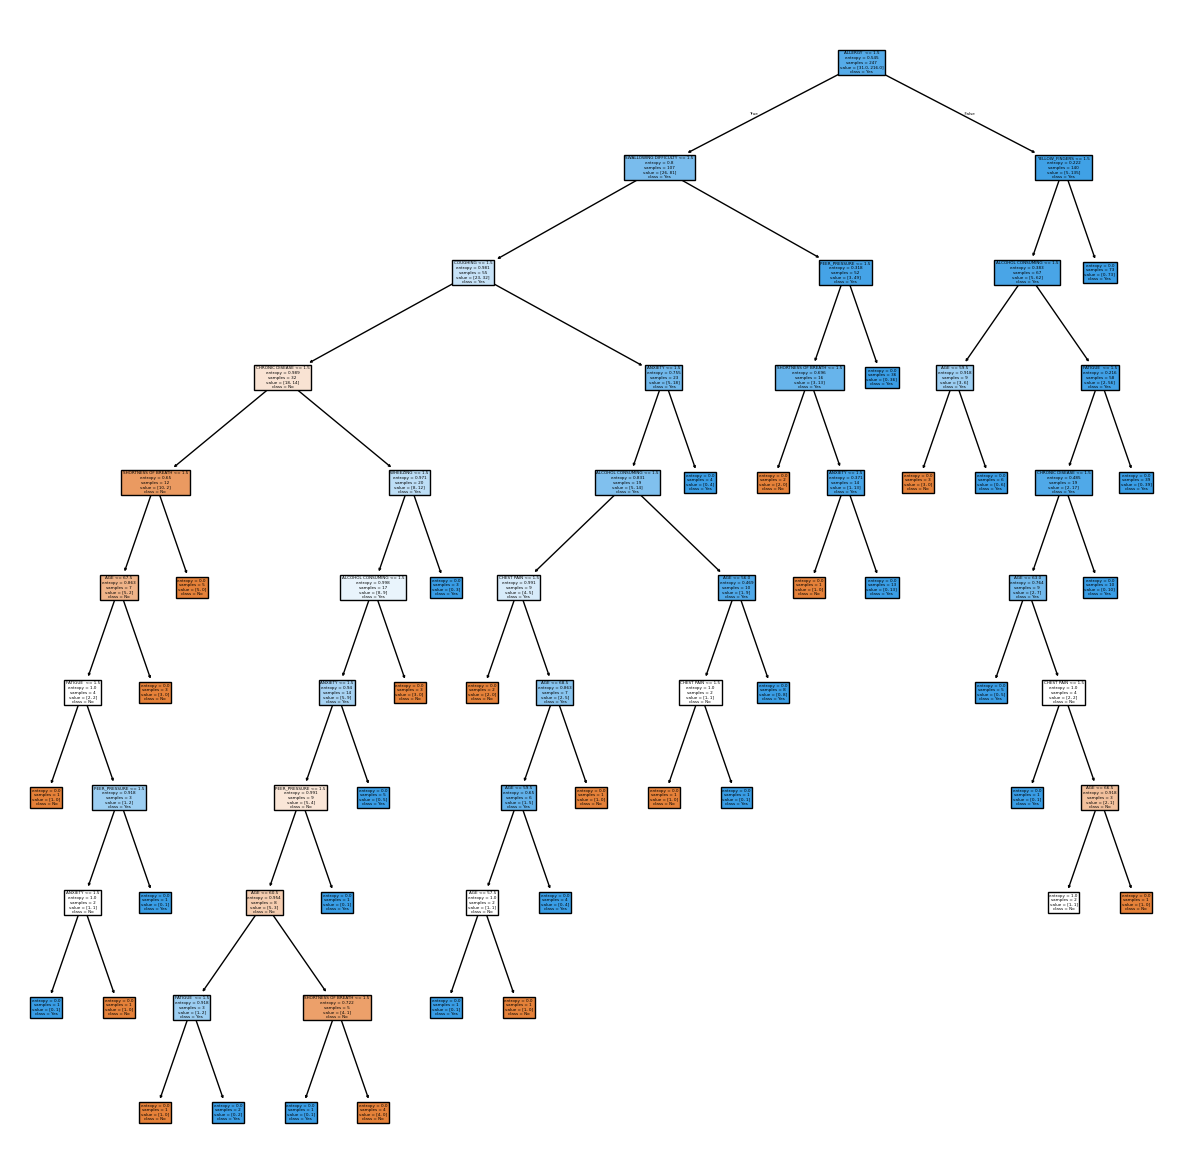

In [56]:
plt.figure(figsize=(15,15))
tree.plot_tree(
    model,
    feature_names = list(x.columns),
    class_names = ['No','Yes'],
    filled = True
);

importance = model.feature_importances_
feature_importance = pd.Series(importance,index=x.columns)
#feature_importance.plot(kind='bar')
plt.ylabel('Importance');

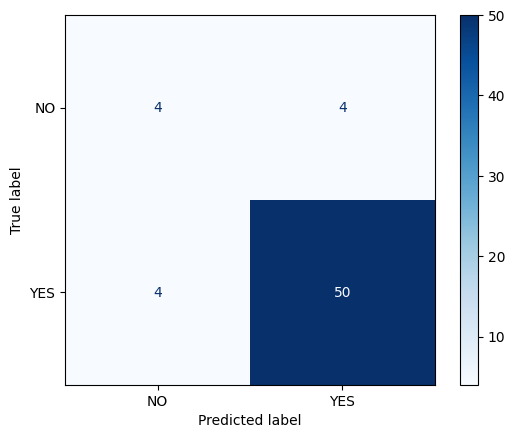

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmatrix = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=dtc.classes_)
disp.plot(cmap='Blues')